In [43]:
#UpperConfidenceBound algorithm under Reinforcement Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [44]:
#Importing the dataset
dataset=pd.read_csv('C:/Users/rukmi/OneDrive/Documents/ML Course/Ads_CTR_Optimisation.csv')

In [45]:
#Implementing UCB Algorithm
import math as m
N = 10000 #Total number of users/rounds
d=10 #Total no. of Ads
ads_selected=[] #Contains the ads that are selected at each round n. So, the total no. of values are 10,000.
numbers_of_selections = [0] * d # Total no. of selections of each ad.
sums_of_rewards = [0] * d # corresponds to sum of the rewards of each ad.
total_reward = 0
for n in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d): # This is to find the upper_bound of each ad at every round.
        if (numbers_of_selections[i]>0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = m.sqrt(3/2 * m.log(n+1)/numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound=1e400
        if (upper_bound>max_upper_bound): # This is to figure out the ad that has the maximum upperbound among the d ads at every round.
            max_upper_bound = upper_bound
            ad=i
    ads_selected.append(ad)
    numbers_of_selections[ad]=numbers_of_selections[ad] + 1
    reward=dataset.values[n, ad]
    sums_of_rewards[ad]=sums_of_rewards[ad] + reward
    total_reward=total_reward + reward
        
    
    

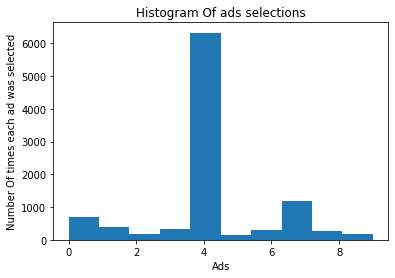

In [46]:
#Visualizing the results
plt.hist(ads_selected)
plt.title('Histogram Of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number Of times each ad was selected')
plt.show()
# From this, Ad4 has been selected at maximum times with in the rounds of 10000. 